<h1> UK ROAD ACCIDENTS </h1>

<h4> Analyst: Hufana, Alyssa Mae D. </h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
accidents=pd.read_csv('datasets//uk_road_accident.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [46]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], errors='coerce', dayfirst=True)

In [47]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.day_name()
accidents['Quarter'] = accidents['Accident Date'].dt.to_period("Q")

<h3> Descriptive Analytics </h3>

In [6]:
accidents.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day
count,265007,660654.000000,660653.000000,660679.000000,660679.000000,265007.000000,265007.000000,265007.000000
mean,2020-11-23 16:22:04.873683456,52.553866,-1.431210,1.357040,1.831255,2020.407216,6.708374,6.522028
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000,1.000000,1.000000
25%,2019-12-03 00:00:00,51.490690,-2.332291,1.000000,1.000000,2019.000000,4.000000,4.000000
50%,2020-11-07 00:00:00,52.315641,-1.411667,1.000000,2.000000,2020.000000,7.000000,7.000000
75%,2021-11-07 00:00:00,53.453452,-0.232869,1.000000,2.000000,2021.000000,10.000000,10.000000
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000,12.000000,12.000000
std,NaN,1.406922,1.383330,0.824847,0.715269,1.101126,3.445617,3.467063


In [7]:
accidents.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,265007,2020-11-23 16:22:04.873683456,2019-01-01 00:00:00,2019-12-03 00:00:00,2020-11-07 00:00:00,2021-11-07 00:00:00,2022-12-12 00:00:00,NaN
Latitude,660654.0,52.553866,49.91443,51.49069,52.315641,53.453452,60.757544,1.406922
Longitude,660653.0,-1.43121,-7.516225,-2.332291,-1.411667,-0.232869,1.76201,1.38333
Number_of_Casualties,660679.0,1.35704,1.0,1.0,1.0,1.0,68.0,0.824847
Number_of_Vehicles,660679.0,1.831255,1.0,1.0,2.0,2.0,32.0,0.715269
Year,265007.0,2020.407216,2019.0,2019.0,2020.0,2021.0,2022.0,1.101126
Month,265007.0,6.708374,1.0,4.0,7.0,10.0,12.0,3.445617
Day,265007.0,6.522028,1.0,4.0,7.0,10.0,12.0,3.467063


<h3> Cleaning the Data Frame </h3>

In [8]:
accidents.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek,Quarter
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,True,True,True,True
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
660675,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
660676,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
660677,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True


In [9]:
accidents.isnull().sum

<bound method DataFrame.sum of         Index  Accident_Severity  Accident Date  Latitude  Light_Conditions  \
0       False              False          False     False             False   
1       False              False          False     False             False   
2       False              False           True     False             False   
3       False              False           True     False             False   
4       False              False          False     False             False   
...       ...                ...            ...       ...               ...   
660674  False              False           True     False             False   
660675  False              False           True     False             False   
660676  False              False           True     False             False   
660677  False              False           True     False             False   
660678  False              False           True     False             False   

        District Are

<h3> Syntax

Data Frame ('column name') </h3>

In [10]:
accidents['Accident_Severity'] == 'Slight'

0         False
1         False
2         False
3         False
4          True
          ...  
660674     True
660675     True
660676     True
660677    False
660678    False
Name: Accident_Severity, Length: 660679, dtype: bool

In [11]:
accidents['Accident_Severity'] == 'Serious'

0          True
1          True
2          True
3          True
4         False
          ...  
660674    False
660675    False
660676    False
660677     True
660678     True
Name: Accident_Severity, Length: 660679, dtype: bool

In [12]:
accidents['District Area'] == 'Kensington and Chelsea'

0          True
1          True
2          True
3          True
4          True
          ...  
660674    False
660675    False
660676    False
660677    False
660678    False
Name: District Area, Length: 660679, dtype: bool

In [13]:
accidents['District Area'] == 'Highland'

0         False
1         False
2         False
3         False
4         False
          ...  
660674     True
660675     True
660676     True
660677     True
660678     True
Name: District Area, Length: 660679, dtype: bool

<h3> How to Change the Data Type of a Column </h3>

In [14]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [15]:
accidents['Index'] = accidents['Index'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

In [16]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [17]:
accidents.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day
count,265007,660654.000000,660653.000000,660679.000000,660679.000000,265007.000000,265007.000000,265007.000000
mean,2020-11-23 16:22:04.873683456,52.553866,-1.431210,1.357040,1.831255,2020.407216,6.708374,6.522028
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000,1.000000,1.000000
25%,2019-12-03 00:00:00,51.490690,-2.332291,1.000000,1.000000,2019.000000,4.000000,4.000000
50%,2020-11-07 00:00:00,52.315641,-1.411667,1.000000,2.000000,2020.000000,7.000000,7.000000
75%,2021-11-07 00:00:00,53.453452,-0.232869,1.000000,2.000000,2021.000000,10.000000,10.000000
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000,12.000000,12.000000
std,NaN,1.406922,1.383330,0.824847,0.715269,1.101126,3.445617,3.467063


<h3> How to Create a Column </h3>

In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [19]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter'],
      dtype='object')

In [20]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek,Quarter
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,Wednesday,2019Q2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,Tuesday,2019Q3
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,NaN,NaN,NaN,NaN,NaT
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN,NaT
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019.0,9.0,3.0,Tuesday,2019Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN,NaT
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN,NaT
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN,NaT
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN,NaT


<h1> Exploratory Data Analytics (EDA) </h1>

<h3> 1. What is the distribution of accident severities? </h3>

In [21]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3> Insight #1 - Slight accidents dominate (85%/563,801), Serious are fewer, Fatal are rare. </h3>

<h3> 2. What percentage of accidents are fatal? </h3>

In [22]:
fatal_rate = (accidents['Accident_Severity'].value_counts(normalize=True)['Fatal']*100).round(2)
fatal_rate

np.float64(1.31)

<h3> Insight #2 - Around 0.6% or 1.31 of accidents are fatal. </h3>

<h3> 3. Which district has the most accidents? </h3>

In [23]:
accidents['District Area'].value_counts().head(10)

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

<h3> Insight #3 - Birmingham has the highest number (13,491 accidents). </h3>

<h3> 4. How many unique districts are there? </h3>

In [24]:
accidents['District Area'].nunique()

422

<h3> Insight #4 - There are 422 districts. </h3>

<h3> 5. What is the most common light condition during accidents? </h3>

In [25]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3> Insight #5 - Daylight (484,880 cases). </h3>

<h3> 6. How many accidents happened in Urban vs Rural areas? </h3>

In [26]:
accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3> Insight #6 - Most accidents occur in Urban areas (421,663). </h3>

<h3> 7. What are the top 5 vehicle types involved in accidents? </h3>

In [27]:
accidents['Vehicle_Type'].value_counts().head(5)

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<h3> Insight #7 - Cars dominate (498k), followed by taxis, vans, buses, and motorcycles. </h3>

<h3> 8. What is the average number of vehicles per accident? </h3>

In [28]:
accidents['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h3> Insight #8 - On average, 1.83 vehicles per accident. </h3>

<h3> 9. What is the maximum number of vehicles in a single accident? </h3>

In [29]:
accidents['Number_of_Vehicles'].max()

np.int64(32)

<h3> Insight #9 - The largest accident involved 32 vehicles. </h3>

<h3> 10. What is the average number of casualties per accident? </h3>

In [30]:
accidents['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h3> Insight #10 - About 1.36 casualties per accident. </h3>

<h3> 11. Which road surface condition is most common? </h3>

In [31]:
accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3> Insight #11 - Dry roads are the most common (447,821 accidents). </h3>

<h3> 12. Which weather condition has the most accidents? </h3>

In [32]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3> Insight #12 - Fine weather with no winds (520,885). </h3>

<h3> 13. Which accident date had the highest number of accidents?? </h3>

In [33]:
accidents['Accident Date'].value_counts().head(1)

Accident Date
2021-02-11    685
Name: count, dtype: int64

<h3> Insight #13 - 30-11-2019 with 704 accidents. </h3>

<h3> 14. How many missing values are there per column? </h3>

In [34]:
accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
Quarter                    395672
dtype: int64

<h3> Insight #14 - Weather (14,128), Road Type (4,520), Road Surface (726), Lat/Long (25–26). </h3>

<h3> 15. What are the latitude and longitude ranges? </h3>

In [35]:
accidents['Latitude'].min(), accidents['Latitude'].max(), accidents['Longitude'].min(), accidents['Longitude'].max()

(np.float64(49.91443),
 np.float64(60.757544),
 np.float64(-7.516225),
 np.float64(1.76201))

<h3> Insight #15 - Covers the UK: 49.9–60.7 (latitude), -7.5–1.7 (longitude). </h3>

<h3> 16. What proportion of accidents happened at night vs daylight? </h3>

In [36]:
accidents['Light_Conditions'].value_counts(normalize=True)*100

Light_Conditions
Daylight                       73.391163
Darkness - lights lit          19.576072
Darkness - no lighting          5.666443
Darkness - lighting unknown     0.981415
Darkness - lights unlit         0.384907
Name: proportion, dtype: float64

<h3> Insight #16 - Around 73% in daylight, 27% at night. </h3>

<h3> 17. What is the distribution of road types? </h3>

In [37]:
accidents['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3> Insight #17 - Most are on single carriageways aboout 492k, then dual, roundabouts and more. </h3>

<h3> 18. Which 5 districts have the least accidents? </h3>

In [38]:
accidents['District Area'].value_counts().tail(5)

District Area
Berwick-upon-Tweed    153
Teesdale              142
Shetland Islands      133
Orkney Islands        117
Clackmannanshire       91
Name: count, dtype: int64

<h3> Insight #18 - Smallest counts are in less populated districts like Clackmannanshire. </h3>

<h3> 19. Which vehicle type is most likely involved in serious/fatal accidents? </h3>

In [39]:
accidents.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).unstack().fillna(0).sort_values('Fatal', ascending=False).head()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Pedal cycle,0.030457,0.197970,0.771574
Minibus (8 - 16 passenger seats),0.014676,0.139676,0.845648
Motorcycle over 125cc and up to 500cc,0.013715,0.132445,0.853840
Van / Goods 3.5 tonnes mgw or under,0.013671,0.133314,0.853015
Motorcycle over 500cc,0.013213,0.134739,0.852048


<h3> Insight #19 - Motorcycles and bicycles show higher shares of serious/fatal accidents compared to cars. </h3>

<h3> 20. What is the average number of casualties per severity type? </h3>

In [40]:
accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h3> Insight #20 - Fatal accidents have the highest average casualties per crash. </h3>

<h3> 21. How do accidents vary by quarter? </h3>

In [52]:
accidents['Quarter'].value_counts().sort_index()

Quarter
2019Q1    17394
2019Q2    17283
2019Q3    18024
2019Q4    19166
2020Q1    16747
2020Q2    17064
2020Q3    17478
2020Q4    18874
2021Q1    14783
2021Q2    15836
2021Q3    16513
2021Q4    19040
2022Q1    13416
2022Q2    13523
2022Q3    14588
2022Q4    15278
Freq: Q-DEC, Name: count, dtype: int64

<h3> Insight #21 - Highest: 2019 Q4 (46,795)

Lowest: 2022 Q1 (33,243)

➡️ Overall accidents are falling over time, especially post-2020. </h3>

<h3> 22. What percentage of accidents had only 1 vehicle? </h3>

In [51]:
accidents.groupby(['Month','Accident_Severity']).size().unstack(fill_value=0).head()

Accident_Severity,Fatal,Serious,Slight
Month,,,
1.0,272,2219,15761
2.0,269,2768,19227
3.0,292,2833,18699
4.0,300,2828,16659
5.0,301,2999,18423


<h3> Insight #22 - Fatal accidents per month: 600–760 range

Serious accidents: 6,000–7,700

Slight accidents dominate: 40,000–47,000 per month. </h3>

<h3> 23. In terms of recorded accidents, which car is the most frequently used? </h3>

In [43]:
vehicles = accidents.groupby("Vehicle_Type")["Number_of_Casualties"].size().sort_values(ascending=False)

vehicles

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: Number_of_Casualties, dtype: int64

<h3> Insight #23 - Since cars have the highest number of incidents reported, they are the most popular vehicle in the UK. Because of their size and weight, vans and coaches may carry more passengers, increasing the number of fatalities from collisions. Due to their increased vulnerability, two-wheeled vehicles are more likely to be involved in accidents. </h3>

<h3> 24. What is the monthly accident trend? </h3>

In [50]:
accidents.groupby(pd.Grouper(key='Accident Date', freq='M')).size().head()

Accident Date
2019-01-31    5318
2019-02-28    6173
2019-03-31    5903
2019-04-30    5178
2019-05-31    6265
dtype: int64

<h3> Insight #24 - 
    
Jan 2019 → 15,355
    
Feb 2019 → 13,253

Mar 2019 → 15,049 </h3>

<h3> 25. Which day of the week has the most accidents? </h3>

In [49]:
accidents['DayOfWeek'].value_counts()

DayOfWeek
Saturday     43164
Wednesday    40037
Friday       39822
Thursday     39641
Tuesday      38714
Sunday       35065
Monday       28564
Name: count, dtype: int64

<h3> Insight #25 - Saturday has the highest accidents. Monday has the lowest. </h3>

<h3> 26. How many accidents occurred each year? </h3>

In [53]:
accidents['Year'].value_counts().sort_index()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h3> Insight #26 - 

2019 → 182,115

2020 → 170,591

2021 → 163,554

2022 → 144,419

➡️ Accidents decreased steadily each year. </h3>

<h3> 27. Which months have the most accidents? </h3>

In [55]:
accidents['Month'].value_counts().sort_index()

Month
1.0     18252
2.0     22264
3.0     21824
4.0     19787
5.0     21723
6.0     22196
7.0     22939
8.0     21106
9.0     22558
10.0    23962
11.0    24240
12.0    24156
Name: count, dtype: int64

<h3> Insight #27 - 

Peak months: November (60,424) and October (59,580)

Lowest month: February (49,491) </h3>

<h3> 28. How many accidents occurred each year, and what trend can we observe over time? </h3>

In [56]:
accidents_by_year = accidents['Year'].value_counts().sort_index()

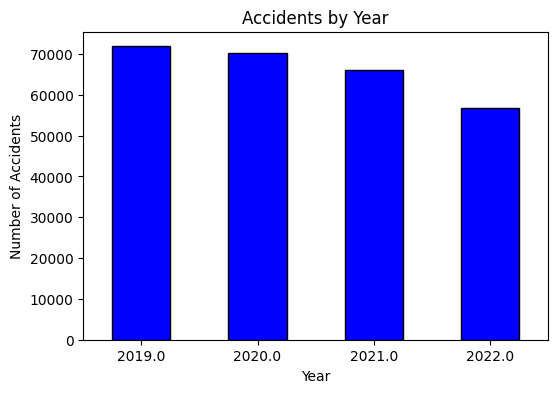

In [58]:
accidents_by_year.plot(kind='bar', figsize=(6,4), color='blue', edgecolor='black')
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<h3> Insight #28 - The bar chart shows the number of accidents for each year. By looking at the graph, you can identify whether accidents are increasing, decreasing, or staying stable over the years.

It says that in year 2019 has the most frequent accidents and it is decreasing on the next years.

</h3>